# Exploring deaths of notable people by year in Wikipedia
By R. Stuart Geiger, last updated 2016-12-28

Dual-licensed under CC-BY-SA 4.0 and the MIT License.

## How many articles are in the "[year] deaths" categories in the English Wikipedia?

The first thing I tried was just counting up the number of articles in each of the "[[year] deaths](https://en.wikipedia.org/wiki/Category:Deaths_by_year)" categories, from 2000-2016. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pickle
%matplotlib inline
matplotlib.style.use('seaborn-darkgrid')

In [2]:
!pip install pywikibot
import pywikibot
site = pywikibot.Site('en', 'wikipedia')

In [3]:
def yearly_death_counts(startyear,endyear):
    years = np.arange(startyear,endyear+1) # add 1 to endyear because np.arange doesn't include the stop 
    deaths_per_year = {}
    for year in years:
        deaths_per_year[year] = 0

    for year in years:
        yearstr = 'Category:' + str(year) + "_deaths"
        deathcat = pywikibot.Page(site, yearstr)
        deathcat_o = site.categoryinfo(deathcat)
        deaths_per_year[year] = deathcat_o['pages']

    yearly_articles_df = pd.DataFrame.from_dict(deaths_per_year, orient='index')
    yearly_articles_df.columns = ['articles in category']
    yearly_articles_df = yearly_articles_df.sort_index()
    
    return yearly_articles_df

In [4]:
yearly_articles_df = yearly_death_counts(2000,2016)
yearly_articles_df

,articles in category
2000,4947
2001,5117
2002,5379
2003,5568
2004,5691
2005,6130
2006,6586
2007,6872
2008,7183
2009,7322


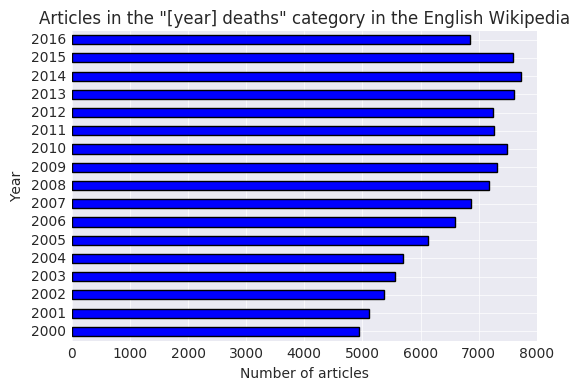

In [5]:
ax = yearly_articles_df.plot(kind='barh')
ax.legend_.remove()
ax.set_xlabel("Number of articles")
ax.set_ylabel("Year")
ax.set_title("""Articles in the "[year] deaths" category in the English Wikipedia""")

### Interpreting total article counts

One of the first things that we see in this graph is that the data is far from uniform, and has a distinct trend. This should make us suspicious. There are about 4,945 articles in the "2000 deaths" category, and the number steadily rises each year to 7,486 articles in the "2010 deaths" category. Is there any compelling reason we have to believe that the number of notable people in the world would steadily increase by a few percent each year from 2000 to 2010, then plateau? Or is it more of an artifact of what Wikipedia's volunteer editors choose to work on? 

What if we look at this over a much longer timescale, like 1800-2016?

In [6]:
yearly_articles_df = yearly_death_counts(1800,2016)

Sleeping for 5.0 seconds, 2017-01-01 02:46:52
Sleeping for 5.0 seconds, 2017-01-01 02:46:57


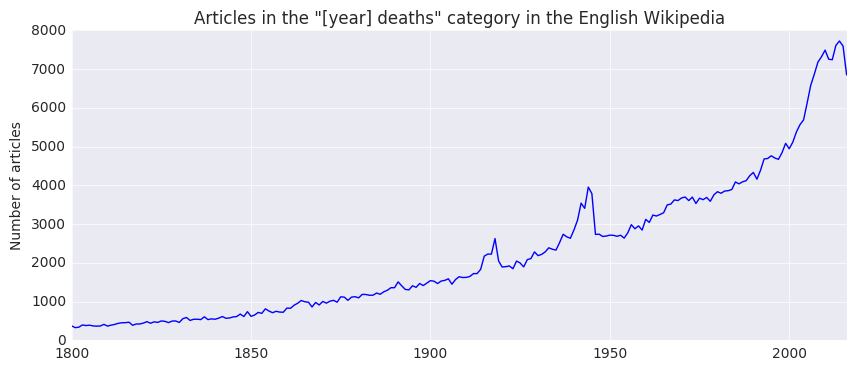

In [7]:
ax = yearly_articles_df.plot(kind='line',figsize=[10,4])
ax.legend_.remove()
ax.set_ylabel("Number of articles")
ax.set_title("""Articles in the "[year] deaths" category in the English Wikipedia""")